In [1]:
import sys
import random
import matplotlib
from QUEEN.queen import * 
from QUEEN import cutsite as cs
from QUEEN.qexperiment import pcr, homology_based_assembly, digestion, ligation, goldengate_assembly
matplotlib.rcParams['font.sans-serif'] = ["Helvetica", "Arial", "Lucida Sans", "DejaVu Sans", "Lucida Grande", "Verdana"]
matplotlib.rcParams['font.family']     = 'sans-serif'

## pRS112 construction (Digestion and Ligation based Cloning)
1. An enhanced green fluorescent protein (eGFP)-encoding cassette was amplified from the pLV-eGFP plasmid using the primer pair RS204/SI627 that has overhang sequences encoding EcoRI and BamHI restriction digestion sites.
2. The eGFP-encoding cassette was digested by EcoRI and BamHI.
3. The destination plasmid pLVSIN-CMV-Puro (Takara) was also digested by EcoRI and BamHI.
4. The eGFP-encoding cassette was cloned into the destination vector using T4 DNA ligase (NEB).

In [2]:
pLVSIN_CMV_pur = QUEEN(record="https://benchling.com/s/seq-0r6kj1kOMYhArIFPTIg5", dbtype="benchling", product="pLVSIN_CMV_pur") 
pLV_eGFP       = QUEEN(record="36083", dbtype="addgene", product="pLV_eGFP") 

In [3]:
pd = "1. An enhanced green fluorescent protein (eGFP)-encoding cassette was amplified from the pLV-eGFP plasmid using the primer pair RS204/SI627 that has overhang sequences encoding EcoRI and BamHI restriction digestion sites."
RS204     = QUEEN(seq="TCCGGTGAATTCCCGAGCGTGTCAGGGTGACCATGGTGAGCAAGGGCGAGGA", product="RS204") #Create a QUEEN object for the forward primer. 
SI627     = QUEEN(seq="CTCCCCTACCCGGTAGAATTGGATCCTTACTTGTACAGCTCGTCC",product="SI627")         #Create a QUEEN object for the reverse primer. 
amplicon  = pcr(pLV_eGFP, RS204, SI627, product="PCR_product", pd=pd) 

In [4]:
pd = "2. The eGFP-encoding cassette was digested by EcoRI and BamHI."
insert = digestion(amplicon, cs.lib["EcoRI"], cs.lib["BamHI"], product="Insert", selection="max", pd=pd)

In [5]:
pd = "3. The destination plasmid pLVSIN-CMV-Puro (Takara) was also digested by EcoRI and BamHI."
backbone = digestion(pLVSIN_CMV_pur, cs.lib["EcoRI"], cs.lib["BamHI"], product="Backbone", selection="max", pd=pd)

In [6]:
pd = "4. The eGFP-encoding cassette was cloned into the destination vector using T4 DNA ligase (NEB)."
pRS112 = ligation(insert, backbone, product="pRS112", pd=pd)

In [7]:
pRS112.printfeature(display=False)

,feature_type,qualifier:label,start,end,strand
100,source,source,0,2807,+
0,LTR,3' LTR,0,634,+
200,misc_feature,HIV-1 Psi,680,806,+
300,misc_feature,RRE,1302,1536,+
400,misc_feature,cPPT/CTS,2027,2143,+
500,enhancer,CMV enhancer,2200,2504,+
600,promoter,CMV promoter,2504,2708,+
800,CDS,EGFP,2828,3548,+
700,CDS,EGFP,2828,3545,+
900,source,null,2848,3529,+


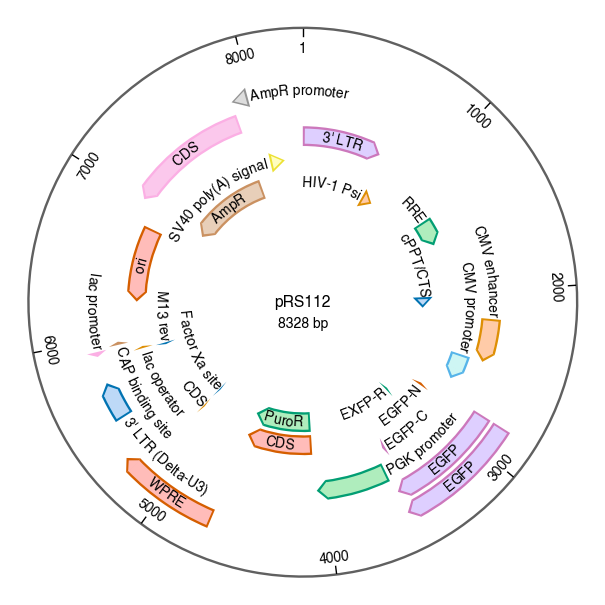

In [8]:
fig = visualizemap(pRS112, tick_interval=1000, title="pRS112", map_view="circular") #Visualize the circular sequence map of pCMV-Target-AIDmax.
#fig.savefig("pRS112.pdf")

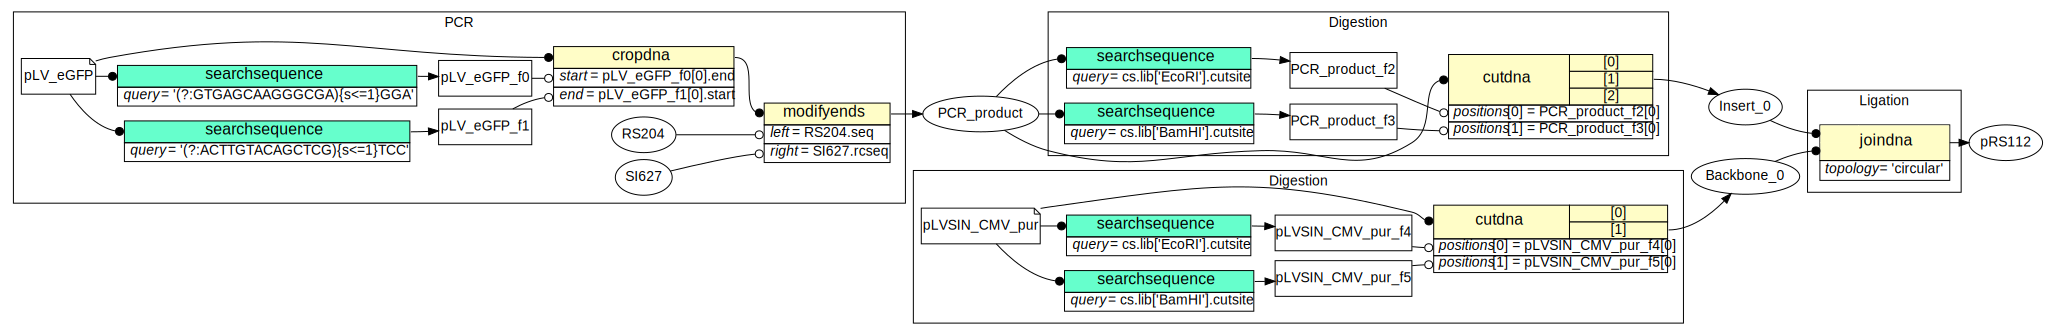

In [9]:
visualizeflow(pRS112)

pCMV-Target-AIDmax construction (Gibon Assembly)
1. A nCas9-encoding fragment was amplified from pCMV-BE4max using the primer pair SI1308/SI1305.
2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer pair SI1304/SI1307.
3. A backbone fragment was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309.
4. The three fragments were assembled by Gibson Assembly.

In [10]:
pCMV_BE4max  = QUEEN(record="https://benchling.com/s/seq-TWeI3GfYr2zJr5z87Rjq", dbtype="benchling", product="pCMV_BE4max")  #Load pCMV-BE4max plasmid object.
pCMV_ABEmax  = QUEEN(record="https://benchling.com/s/seq-OCkN5m6U6st0I9ToyOn1", dbtype="benchling", product="pCMV_ABEmax")  #Load pCMV-ABEmnax plasmid object.
opt_CDA1_ugi = QUEEN(record="https://benchling.com/s/seq-APwTvCrCHnd38ugWloNK", dbtype="benchling", product="opt_CDA1_ugi") #Load opt_CDA1_ugi plasmid object.

In [11]:
pd = "1. A nCas9-encoding fragment was amplified from pCMV-BE4max using the primer pair SI1308/SI1305."
SI1308    = QUEEN(seq="ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT", product="SI1308") #Create a QUEEN object for the forward primer.
SI1305    = QUEEN(seq="GTCACCTCCCAGCTGAGACAGGTCG", product="SI1305")                     #Create a QUEEN object for the reverse primer.
amplicon1 = pcr(pCMV_BE4max, SI1308, SI1305, product="amplicon1", pd=pd)
amplicon1.setfeature({"qualifier:label":"fragment-1"})

In [12]:
pd = "2. A fragment encoding the human codon-optimized PmCDA1-UGI was amplified from the pUC-optimized-PmCDA1-ugi plasmid using the primer pair SI1304/SI1307."
SI1304    = QUEEN(seq="CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG", product="SI1304") #Create a QUEEN object for the forward primer.
SI1307    = QUEEN(seq="TCAGCGGGTTTAAACTCATTATCACAGCATTTTGATTTTGTTCTC", product="SI1307") #Create a QUEEN object for the reverse primer.
amplicon2 = pcr(opt_CDA1_ugi, SI1304, SI1307, product="amplicon2", pd=pd)
amplicon2.setfeature({"qualifier:label":"fragment-2"})

In [13]:
pd = "3. A backbone fragment was amplified from pCMV-ABEmax using the primer pair SI1310/SI1309."
SI1310    = QUEEN(seq="TGATAATGAGTTTAAACCCGCTGA", product="SI1310")     #Create a QUEEN object for the forward primer.
SI1309    = QUEEN(seq="GACTTTCCGCTTCTTCTTTGGTGACTCG", product="SI1309") #Create a QUEEN object for the reverse primer.
amplicon3 = pcr(pCMV_ABEmax, SI1310, SI1309, product="amplicon3", pd=pd) 
amplicon3.setfeature({"qualifier:label":"fragment-3"})

In [14]:
pd = "4. The three fragments were assembled by Gibson Assembly."
pCMV_Target_AIDmax = homology_based_assembly(amplicon1, amplicon2, amplicon3, mode="gibson", pd=pd, product="pCMV_Target_AIDmax")
#pCMV_Target_AIDmax = homology_based_assembly(amplicon1, amplicon3, amplicon2, mode="gibson", pd=pd, product="pCMV_Target_AIDmax") #Any order is acceptable

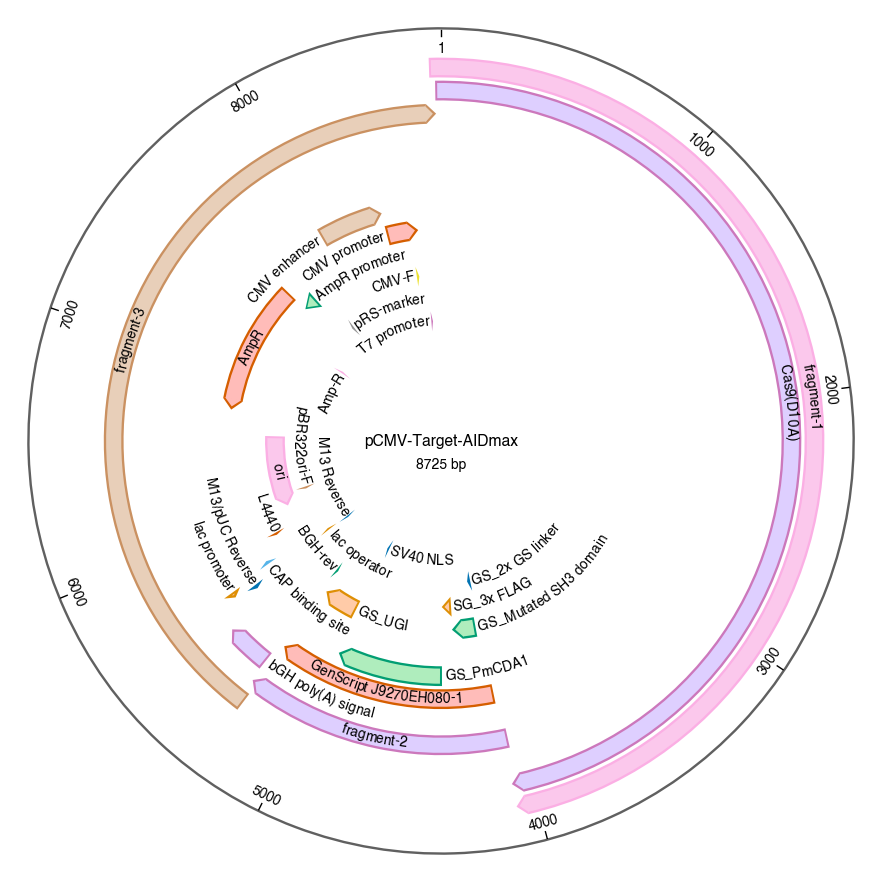

In [15]:
fig = visualizemap(pCMV_Target_AIDmax, tick_interval=1000, title="pCMV-Target-AIDmax", map_view="circular") #Visualize the circular sequence map of pCMV-Target-AIDmax.
#fig.savefig("pCMV_Target_AIDmax_qexperment.pdf")

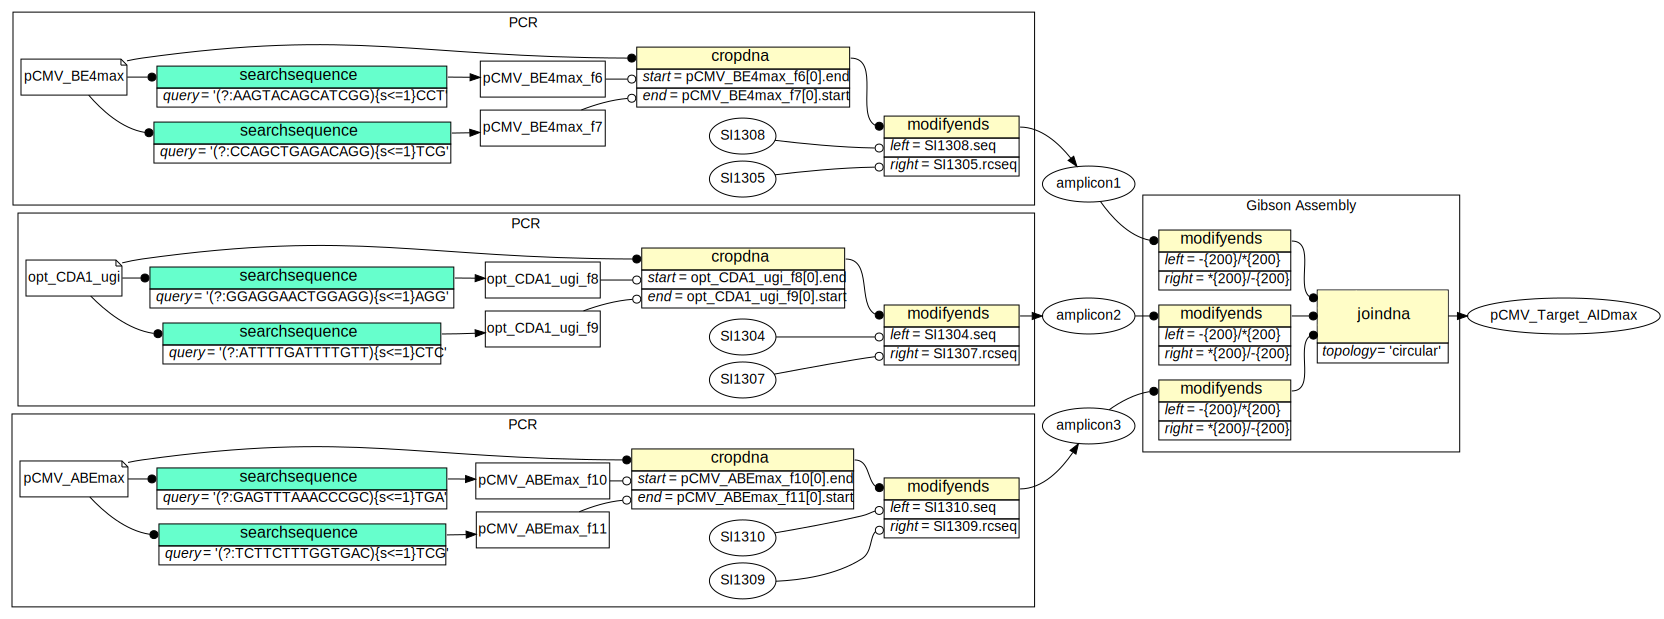

In [16]:
visualizeflow(pCMV_Target_AIDmax)